Final data is processed, Dummy variables are created, Data is split into training set and test set. Algorithms like SVM, Descision trees and Feed Neural networks are used.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

In [0]:
df=pd.read_csv('tweet_viral.csv', index_col=False)
df = df.iloc[:,1:]

In [0]:
df.head()

,user_id,timestamp,text,has_media,likes,viral or not,replies,followers,total_likes,num_tweets
0,2421885032,Evening,1.0,False,20,0,30,1800.0,416.0,1175.0
1,191881312,Evening,-1.0,False,38,0,1,39447.0,7416.0,26019.0
2,1125085620,Evening,1.0,True,631,0,111,34822.0,6037.0,2088.0
3,28515858,Evening,0.0,False,1674,0,16,2728479.0,3859.0,14913.0
4,28515858,Evening,1.0,False,583,0,14,2728479.0,3859.0,14913.0


In [0]:
df.describe()

,user_id,text,likes,viral or not,replies,followers,total_likes,num_tweets
count,1.056300e+04,10562.000000,10563.000000,10563.000000,10563.000000,7.678000e+03,7678.000000,7.678000e+03
mean,2.541155e+17,0.046203,386.085771,0.016189,23.034176,3.253121e+05,23671.871451,6.251025e+04
std,4.316954e+17,0.722667,2336.214455,0.126206,216.343910,1.455667e+06,40382.321132,1.062639e+05
min,4.970411e+06,-1.000000,3.000000,0.000000,0.000000,6.000000e+00,1.000000,1.200000e+01
25%,1.366967e+08,0.000000,47.000000,0.000000,2.000000,5.881500e+03,1934.000000,9.430500e+03
50%,1.058850e+09,0.000000,97.000000,0.000000,5.000000,2.382100e+04,8605.000000,2.838100e+04
75%,7.160961e+17,1.000000,237.500000,0.000000,14.000000,9.196200e+04,24853.000000,6.100700e+04
max,1.250911e+18,1.000000,151021.000000,1.000000,19546.000000,4.154240e+07,522563.000000,1.638318e+06


In [0]:
df.dropna(subset = ["followers"], inplace=True)

In [0]:
df.dropna(subset = ["text"], inplace=True)

In [0]:
y=df.iloc[:,5:6]

In [0]:
df

,user_id,timestamp,text,has_media,likes,viral or not,replies,followers,total_likes,num_tweets
0,2421885032,Evening,1.0,False,20,0,30,1800.0,416.0,1175.0
1,191881312,Evening,-1.0,False,38,0,1,39447.0,7416.0,26019.0
2,1125085620,Evening,1.0,True,631,0,111,34822.0,6037.0,2088.0
3,28515858,Evening,0.0,False,1674,0,16,2728479.0,3859.0,14913.0
4,28515858,Evening,1.0,False,583,0,14,2728479.0,3859.0,14913.0
...,...,...,...,...,...,...,...,...,...,...
10558,54161723,Evening,-1.0,False,175,0,14,69510.0,6215.0,13917.0
10559,195449965,Evening,1.0,False,205,0,7,9728.0,3744.0,864.0
10560,61831375,Evening,0.0,True,47,0,5,589084.0,1019.0,143084.0
10561,131437479,Evening,0.0,False,115,0,2,536.0,9372.0,67271.0


In [0]:
X = df.drop(columns=['viral or not'])

In [0]:
y['viral or not'].value_counts()

0    7541
1     136
Name: viral or not, dtype: int64

In [0]:
X.describe()

,user_id,text,likes,replies,followers,total_likes,num_tweets
count,7.677000e+03,7677.000000,7677.000000,7677.000000,7.677000e+03,7677.000000,7.677000e+03
mean,1.018433e+09,0.044418,435.369285,25.189918,3.253505e+05,23672.655074,6.250961e+04
std,1.287377e+09,0.743029,2679.809890,251.125625,1.455758e+06,40384.893093,1.062708e+05
min,4.970411e+06,-1.000000,3.000000,0.000000,6.000000e+00,1.000000,1.200000e+01
25%,9.358978e+07,-1.000000,51.000000,2.000000,5.873000e+03,1932.000000,9.430000e+03
50%,3.288945e+08,0.000000,105.000000,5.000000,2.382100e+04,8605.000000,2.838100e+04
75%,1.727650e+09,1.000000,261.000000,14.000000,9.196200e+04,24853.000000,6.100700e+04
max,4.925724e+09,1.000000,151021.000000,19546.000000,4.154240e+07,522563.000000,1.638318e+06


In [0]:
X=X.drop(columns='user_id')

In [0]:
X

,timestamp,text,has_media,likes,replies,followers,total_likes,num_tweets
0,Evening,1.0,False,20,30,1800.0,416.0,1175.0
1,Evening,-1.0,False,38,1,39447.0,7416.0,26019.0
2,Evening,1.0,True,631,111,34822.0,6037.0,2088.0
3,Evening,0.0,False,1674,16,2728479.0,3859.0,14913.0
4,Evening,1.0,False,583,14,2728479.0,3859.0,14913.0
...,...,...,...,...,...,...,...,...
10558,Evening,-1.0,False,175,14,69510.0,6215.0,13917.0
10559,Evening,1.0,False,205,7,9728.0,3744.0,864.0
10560,Evening,0.0,True,47,5,589084.0,1019.0,143084.0
10561,Evening,0.0,False,115,2,536.0,9372.0,67271.0


Understanding different variables and visualizing them using boxplots

In [0]:
X['timestamp'].value_counts()

Evening    2738
Morning    2304
Noon       1358
Night      1277
Name: timestamp, dtype: int64

In [0]:
X['has_media'].value_counts()

False    4927
True     2750
Name: has_media, dtype: int64

In [0]:
X['text'].value_counts()

 0.0    3424
 1.0    2297
-1.0    1956
Name: text, dtype: int64

In [0]:
X['followers'].describe()

count    7.677000e+03
mean     3.253505e+05
std      1.455758e+06
min      6.000000e+00
25%      5.873000e+03
50%      2.382100e+04
75%      9.196200e+04
max      4.154240e+07
Name: followers, dtype: float64

In [0]:
X['followers']

0           1800.0
1          39447.0
2          34822.0
3        2728479.0
4        2728479.0
           ...    
10558      69510.0
10559       9728.0
10560     589084.0
10561        536.0
10562      28039.0
Name: followers, Length: 7677, dtype: float64

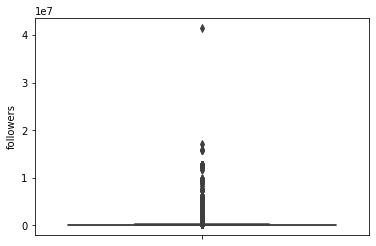

In [0]:
sns.boxplot(y='followers', data=X)

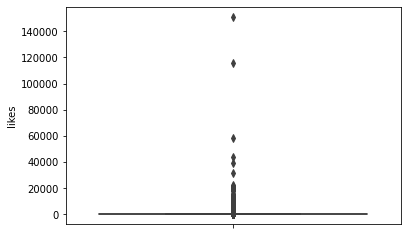

In [0]:
sns.boxplot(y='likes', data=X)

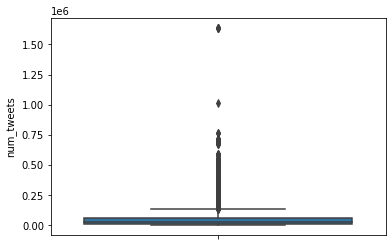

In [0]:
sns.boxplot(y='num_tweets', data=X)

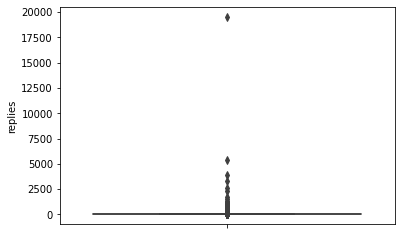

In [0]:
sns.boxplot(y='replies', data=X)

In [0]:
X.describe()

,text,likes,replies,followers,total_likes,num_tweets
count,7677.000000,7677.000000,7677.000000,7.677000e+03,7677.000000,7.677000e+03
mean,0.044418,435.369285,25.189918,3.253505e+05,23672.655074,6.250961e+04
std,0.743029,2679.809890,251.125625,1.455758e+06,40384.893093,1.062708e+05
min,-1.000000,3.000000,0.000000,6.000000e+00,1.000000,1.200000e+01
25%,-1.000000,51.000000,2.000000,5.873000e+03,1932.000000,9.430000e+03
50%,0.000000,105.000000,5.000000,2.382100e+04,8605.000000,2.838100e+04
75%,1.000000,261.000000,14.000000,9.196200e+04,24853.000000,6.100700e+04
max,1.000000,151021.000000,19546.000000,4.154240e+07,522563.000000,1.638318e+06


In [0]:
#Checking for NULL values
X.isnull()

,timestamp,text,has_media,likes,replies,followers,total_likes,num_tweets
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
10558,False,False,False,False,False,False,False,False
10559,False,False,False,False,False,False,False,False
10560,False,False,False,False,False,False,False,False
10561,False,False,False,False,False,False,False,False


In [0]:
X.isnull().sum()

timestamp      0
text           0
has_media      0
likes          0
replies        0
followers      0
total_likes    0
num_tweets     0
dtype: int64

In [0]:
y=y.reset_index()

In [0]:
y.drop('index', axis=1)

,viral or not
0,0
1,0
2,0
3,0
4,0
...,...
7672,0
7673,0
7674,0
7675,0


In [0]:
y['viral or not'].value_counts()

0    7541
1     136
Name: viral or not, dtype: int64

In [0]:
#Creating the dummy variables
X = pd.concat([X,pd.get_dummies(X['timestamp'], prefix='time')],axis=1)
X.drop(['timestamp'],axis=1, inplace=True)

In [0]:
X = pd.concat([X,pd.get_dummies(X['text'], prefix='text')],axis=1)
X.drop(['text'],axis=1, inplace=True)

In [0]:
#Converting Media values into binary
X.has_media = df.has_media.astype(int)

In [0]:
X

,has_media,likes,replies,followers,total_likes,num_tweets,time_Evening,time_Morning,time_Night,time_Noon,text_-1.0,text_0.0,text_1.0
0,0,20,30,1800.0,416.0,1175.0,1,0,0,0,0,0,1
1,0,38,1,39447.0,7416.0,26019.0,1,0,0,0,1,0,0
2,1,631,111,34822.0,6037.0,2088.0,1,0,0,0,0,0,1
3,0,1674,16,2728479.0,3859.0,14913.0,1,0,0,0,0,1,0
4,0,583,14,2728479.0,3859.0,14913.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10558,0,175,14,69510.0,6215.0,13917.0,1,0,0,0,1,0,0
10559,0,205,7,9728.0,3744.0,864.0,1,0,0,0,0,0,1
10560,1,47,5,589084.0,1019.0,143084.0,1,0,0,0,0,1,0
10561,0,115,2,536.0,9372.0,67271.0,1,0,0,0,0,1,0


In [0]:
x = X[['likes']].values.astype(float)

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()

In [0]:
x_scaled = min_max_scaler.fit_transform(x)

In [0]:
x_normalized = pd.DataFrame(x_scaled)

In [0]:
X=X.reset_index()

In [0]:
X['likes']=x_normalized

Normalizing the Independent variables using MinMaxScaler

In [0]:
x = X[['replies']].values.astype(float) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X['replies'] = pd.DataFrame(x_scaled)

In [0]:
x = X[['followers']].values.astype(float) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X['followers'] = pd.DataFrame(x_scaled)

x = X[['total_likes']].values.astype(float) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X['total_likes'] = pd.DataFrame(x_scaled)

x = X[['num_tweets']].values.astype(float) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X['num_tweets'] = pd.DataFrame(x_scaled)

In [0]:
X=X.drop('index', axis=1)

In [0]:
X.rename(columns = {'text_-1.0':'Negative','text_0.0':'Neutral','text_1.0':'Positive' }, inplace = True)

In [0]:
X

,has_media,likes,replies,followers,total_likes,num_tweets,time_Evening,time_Morning,time_Night,time_Noon,Negative,Neutral,Positive
0,0,0.000113,0.001535,0.000043,0.000794,0.000710,1,0,0,0,0,0,1
1,0,0.000232,0.000051,0.000949,0.014190,0.015874,1,0,0,0,1,0,0
2,1,0.004158,0.005679,0.000838,0.011551,0.001267,1,0,0,0,0,0,1
3,0,0.011065,0.000819,0.065679,0.007383,0.009095,1,0,0,0,0,1,0
4,0,0.003841,0.000716,0.065679,0.007383,0.009095,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,0,0.001139,0.000716,0.001673,0.011891,0.008487,1,0,0,0,1,0,0
7673,0,0.001338,0.000358,0.000234,0.007163,0.000520,1,0,0,0,0,0,1
7674,1,0.000291,0.000256,0.014180,0.001948,0.087329,1,0,0,0,0,1,0
7675,0,0.000742,0.000102,0.000013,0.017933,0.041054,1,0,0,0,0,1,0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

In [0]:
y=y.drop(columns='index')

In [0]:
#Splitting the dataset into training set and test set.
X_train, X_val, Y_train, Y_val = train_test_split(X, y, stratify=y, random_state=0)


In [0]:
X_train

,has_media,likes,replies,followers,total_likes,num_tweets,time_Evening,time_Morning,time_Night,time_Noon,Negative,Neutral,Positive
3230,1,0.001384,0.000921,3.403752e-04,0.006242,0.002083,0,0,0,1,0,0,1
671,1,0.000947,0.000409,1.029551e-04,0.000038,0.000222,0,0,0,1,0,1,0
81,0,0.001920,0.000307,2.472173e-05,0.040233,0.028844,0,1,0,0,0,0,1
2672,0,0.004933,0.003019,1.079666e-02,0.019766,0.012469,0,0,0,1,0,0,1
3947,1,0.000781,0.000051,4.092205e-07,0.002256,0.000201,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,0,0.000417,0.000409,5.252345e-03,0.000943,0.188120,0,0,1,0,0,1,0
1810,0,0.000576,0.000000,2.213546e-03,0.045237,0.017558,0,1,0,0,0,0,1
2220,0,0.004476,0.002609,3.167463e-03,0.000067,0.001364,0,1,0,0,0,1,0
4377,0,0.000199,0.000102,2.840833e-03,0.000748,0.038832,0,0,0,1,0,1,0


In [0]:
Y_train

,viral or not
3230,0
671,0
81,0
2672,0
3947,0
...,...
3261,0
1810,0
2220,0
4377,0


In [0]:
X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train.values, Y_train.values, X_val.values, Y_val.values))

In [0]:
input = torch.randn (3, 4)

In [0]:
input.dim()

2

In [0]:
class FirstNetwork_v2(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(13, 15), 
        nn.ReLU(),
        nn.Linear(15, 15), 
        nn.ReLU(),
        nn.Linear(15, 13), 
        nn.ReLU(),
        nn.Linear(13, 2), 
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

In [0]:
def fit_v2(x, y, model, opt, loss_fn, epochs = 100):
  acc_arr = []
  for epoch in range(epochs):
    
    y_hat=model(x)
    
    loss = loss_fn(y_hat, y)
    acc_arr.append(accuracy(y_hat, Y_train))

    loss.backward()
    opt.step()
    opt.zero_grad()
  plt.plot(acc_arr, 'b-')
  plt.show()
  return loss.item()

In [0]:
fn = FirstNetwork_v2()
loss_fn = F.cross_entropy
opt = optim.Adam(fn.parameters(), lr=1)
fit_v2(X_train.float, Y_train.float, fn, opt, loss_fn)

In [0]:
type(input)

torch.Tensor

In [0]:
X

,has_media,likes,replies,followers,total_likes,num_tweets,time_Evening,time_Morning,time_Night,time_Noon,Negative,Neutral,Positive
0,0,0.000113,0.001535,0.000043,0.000794,0.000710,1,0,0,0,0,0,1
1,0,0.000232,0.000051,0.000949,0.014190,0.015874,1,0,0,0,1,0,0
2,1,0.004158,0.005679,0.000838,0.011551,0.001267,1,0,0,0,0,0,1
3,0,0.011065,0.000819,0.065679,0.007383,0.009095,1,0,0,0,0,1,0
4,0,0.003841,0.000716,0.065679,0.007383,0.009095,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,0,0.001139,0.000716,0.001673,0.011891,0.008487,1,0,0,0,1,0,0
7673,0,0.001338,0.000358,0.000234,0.007163,0.000520,1,0,0,0,0,0,1
7674,1,0.000291,0.000256,0.014180,0.001948,0.087329,1,0,0,0,0,1,0
7675,0,0.000742,0.000102,0.000013,0.017933,0.041054,1,0,0,0,0,1,0


In [0]:
from sklearn import svm
from sklearn import metrics

In [0]:
clf = svm.SVC(kernel='linear')

In [0]:
clf.fit(X_train, Y_train.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = clf.predict(X_val)

In [0]:
print("Accuracy:",metrics.accuracy_score(Y_val, y_pred))

Accuracy: 0.9822916666666667


In [0]:
result=metrics.confusion_matrix(Y_val, y_pred)

In [0]:
#Confusion matrix, SVM
print(result)

[[1886    0]
 [  34    0]]


In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

In [0]:
y_pred = clf.predict(X_val)

In [0]:
print("Accuracy:",metrics.accuracy_score(Y_val, y_pred))

Accuracy: 0.9817708333333334


In [0]:
result=metrics.confusion_matrix(Y_val, y_pred)

In [0]:
#Confusion matrix, Descision tree
print(result)

[[1871   15]
 [  20   14]]


In [0]:
X_train

,has_media,likes,replies,followers,total_likes,num_tweets,time_Evening,time_Morning,time_Night,time_Noon,Negative,Neutral,Positive
3230,1,0.001384,0.000921,3.403752e-04,0.006242,0.002083,0,0,0,1,0,0,1
671,1,0.000947,0.000409,1.029551e-04,0.000038,0.000222,0,0,0,1,0,1,0
81,0,0.001920,0.000307,2.472173e-05,0.040233,0.028844,0,1,0,0,0,0,1
2672,0,0.004933,0.003019,1.079666e-02,0.019766,0.012469,0,0,0,1,0,0,1
3947,1,0.000781,0.000051,4.092205e-07,0.002256,0.000201,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,0,0.000417,0.000409,5.252345e-03,0.000943,0.188120,0,0,1,0,0,1,0
1810,0,0.000576,0.000000,2.213546e-03,0.045237,0.017558,0,1,0,0,0,0,1
2220,0,0.004476,0.002609,3.167463e-03,0.000067,0.001364,0,1,0,0,0,1,0
4377,0,0.000199,0.000102,2.840833e-03,0.000748,0.038832,0,0,0,1,0,1,0


In [0]:
Y_train

,viral or not
3230,0
671,0
81,0
2672,0
3947,0
...,...
3261,0
1810,0
2220,0
4377,0


In [0]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(15, input_dim=13, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, epochs=100, batch_size=10)

Epoch 1/100
5757/5757 [==============================] - 1s 205us/step - loss: 0.1289 - accuracy: 0.9823
Epoch 2/100
5757/5757 [==============================] - 1s 122us/step - loss: 0.0878 - accuracy: 0.9823
Epoch 3/100
5757/5757 [==============================] - 1s 124us/step - loss: 0.0856 - accuracy: 0.9823
Epoch 4/100
5757/5757 [==============================] - 1s 131us/step - loss: 0.0838 - accuracy: 0.9823
Epoch 5/100
5757/5757 [==============================] - 1s 118us/step - loss: 0.0815 - accuracy: 0.9823
Epoch 6/100
5757/5757 [==============================] - 1s 125us/step - loss: 0.0797 - accuracy: 0.9823
Epoch 7/100
5757/5757 [==============================] - 1s 120us/step - loss: 0.0773 - accuracy: 0.9823
Epoch 8/100
5757/5757 [==============================] - 1s 117us/step - loss: 0.0749 - accuracy: 0.9823
Epoch 9/100
5757/5757 [==============================] - 1s 118us/step - loss: 0.0714 - accuracy: 0.9826
Epoch 10/100
5757/5757 [==============================]

In [0]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

7677/7677 [==============================] - 0s 20us/step
Accuracy: 99.14


In [0]:
predictions = model.predict(X_val)

In [0]:
predictions

array([[6.6497787e-06],
       [1.2459509e-06],
       [2.7290285e-05],
       ...,
       [5.8022380e-02],
       [7.8206584e-05],
       [9.5382078e-05]], dtype=float32)

In [0]:
#Confusion matrix, Feed forward Neural network
result=metrics.confusion_matrix(Y_val, predictions.round())
print(result)

[[1881    5]
 [  22   12]]


We can improve this accuracy by collecting more data, and by using better algorithms. 

We can also add more features like hashtags, text elements, For eg: Using hashtags related to current trend could make a tweet go viral.